## Module submission header
### Submission preparation instructions 
_Completion of this header is mandatory, subject to a 2-point deduction to the assignment._ Only add plain text in the designated areas, i.e., replacing the relevant 'NA's. You must fill out all group member Names and Drexel email addresses in the below markdown list, under header __Module submission group__. It is required to fill out descriptive notes pertaining to any tutoring support received in the completion of this submission under the __Additional submission comments__ section at the bottom of the header. If no tutoring support was received, leave NA in place. You may as well list other optional comments pertaining to the submission at bottom. _Any distruption of this header's formatting will make your group liable to the 2-point deduction._

### Module submission group
- Group member 1
    - Name: Rishabh Sharma
    - Email: rs3738@drexel.edu
- Group member 2
    - Name: Shai Wudkwych
    - Email: sw3468@drexel.edu

### Additional submission comments
- Tutoring support received: NA
- Other (other): NA

# Assignment group 2: Network and exploratory data analysis

## Module C _(40 pts)_ Exploring a network of ingredients
In this section we're going to experiment with some recipes data, but think of them as a network. These data can be obtained from Kaggle:

- https://www.kaggle.com/kaggle/recipe-ingredients-dataset

and are packaged with the assignment in the following directory:

- `./data/train.json`

__C1.__ _(2 pts)_ To start, write a function called `read_recipes`, which takes a string argument called `path_to_recipes_json` that contains the path to a json file containing recipe data. The function should use the `json` package to load the data and then return `recipes`, which will be a list of dictionaries containing the converted json data.

In [1]:
# C1:Function(2/2)

import json

def read_recipes(path_to_recipes_json):
    #--- Your code starts here
    with open(path_to_recipes_json) as f:
        recipes = json.load(f)
    #--- Your code ends here
    
    return recipes


To test your function, let's provide it with the path to the `train.json` data and print the first three recipes.

Your output should look like this:

```
{'id': 10259, 'cuisine': 'greek', 'ingredients': ['feta cheese crumbles', 'garlic', 'seasoning', 'grape tomatoes', 'black olives', 'garbanzo beans', 'pepper', 'purple onion', 'romaine lettuce']} 

{'id': 25693, 'cuisine': 'southern_us', 'ingredients': ['ground pepper', 'ground black pepper', 'vegetable oil', 'plain flour', 'thyme', 'salt', 'green tomatoes', 'milk', 'yellow corn meal', 'eggs', 'tomatoes']} 

{'id': 20130, 'cuisine': 'filipino', 'ingredients': ['butter', 'green chilies', 'cooking oil', 'chicken livers', 'pepper', 'salt', 'grilled chicken breasts', 'garlic powder', 'soy sauce', 'mayonaise', 'yellow onion', 'eggs']}
```

In [2]:
# C1:SanityCheck

recipes = read_recipes('./data/train.json')

for recipe in recipes[:3]:
    print(recipe,"\n")

{'id': 10259, 'cuisine': 'greek', 'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']} 

{'id': 25693, 'cuisine': 'southern_us', 'ingredients': ['plain flour', 'ground pepper', 'salt', 'tomatoes', 'ground black pepper', 'thyme', 'eggs', 'green tomatoes', 'yellow corn meal', 'milk', 'vegetable oil']} 

{'id': 20130, 'cuisine': 'filipino', 'ingredients': ['eggs', 'pepper', 'salt', 'mayonaise', 'cooking oil', 'green chilies', 'grilled chicken breasts', 'garlic powder', 'yellow onion', 'soy sauce', 'butter', 'chicken livers']} 



__C2.__ _(5 pts)_ Write a function called `create_recipe_graph` that takes the output from our `read_recipes` function (i.e., `recipe_data`) and builds an _undirected_ network representation of the ingredients data using the NetworkX module. The output of this function should be a graph where nodes represent ingredients and for each pair of ingredients that appear in the same recipe there should be a link between them. Note that output graph should be of the NetworkX `.Graph()` type.

In [3]:
# C2:Function(5/5)

import networkx as nx

def create_recipe_graph(recipe_data):
    #--- Your code starts here
    graph = nx.Graph()
    # Write a function called `create_recipe_graph` that takes the output from our `read_recipes` function (i.e., `recipe_data`) and builds an _undirected_ network representation of the ingredients data using the NetworkX module. The output of this function should be a graph where nodes represent ingredients and for each pair of ingredients that appear in the same recipe there should be a link between them. Note that output graph should be of the NetworkX `.Graph()` type.
    for recipe in recipe_data:
        for ingredient in recipe['ingredients']:
            graph.add_node(ingredient)
            for ingredient2 in recipe['ingredients']:
                if ingredient != ingredient2:
                    graph.add_edge(ingredient, ingredient2)
    #---Your code ends here
    
    return graph

To evaluate your function, let's apply it to the recipies we've loaded and print the edges connected to the "feta cheese crumbles" ingredient node.

Your output should look like this:
```
('feta cheese crumbles', 'feta cheese crumbles')
('feta cheese crumbles', 'garlic')
('feta cheese crumbles', 'seasoning')
('feta cheese crumbles', 'grape tomatoes')
('feta cheese crumbles', 'black olives')
('feta cheese crumbles', 'garbanzo beans')
('feta cheese crumbles', 'pepper')
('feta cheese crumbles', 'purple onion')
('feta cheese crumbles', 'romaine lettuce')
('feta cheese crumbles', 'baby spinach leaves')
('feta cheese crumbles', 'ground cinnamon')
('feta cheese crumbles', 'olive oil')
('feta cheese crumbles', 'hamburger buns')
('feta cheese crumbles', 'balsamic vinegar')
...
```

In [4]:
# C2:SanityCheck

recipe_graph = create_recipe_graph(recipes)
for edge in recipe_graph.edges:
    if edge[0] == "feta cheese crumbles":
        print(edge)

('feta cheese crumbles', 'olive oil')
('feta cheese crumbles', 'salt')
('feta cheese crumbles', 'hamburger buns')
('feta cheese crumbles', 'paprika')
('feta cheese crumbles', 'chopped fresh mint')
('feta cheese crumbles', 'ground cinnamon')
('feta cheese crumbles', 'balsamic vinegar')
('feta cheese crumbles', 'baby spinach leaves')
('feta cheese crumbles', 'ground lamb')
('feta cheese crumbles', 'tomatoes')
('feta cheese crumbles', 'extra-virgin olive oil')
('feta cheese crumbles', 'juice')
('feta cheese crumbles', 'green pepper')
('feta cheese crumbles', 'cucumber')
('feta cheese crumbles', 'capers')
('feta cheese crumbles', 'vinaigrette dressing')
('feta cheese crumbles', 'kalamata')
('feta cheese crumbles', 'lemon juice')
('feta cheese crumbles', 'dried oregano')
('feta cheese crumbles', 'chopped parsley')
('feta cheese crumbles', 'fresh rosemary')
('feta cheese crumbles', 'fresh thyme leaves')
('feta cheese crumbles', 'onions')
('feta cheese crumbles', 'minced garlic')
('feta chees

__C3.__ _(8 pts)_ Utilize NetworkX and the ingredients network and find the node degrees, i.e., numbers of connections to other ingredients across the recipes. Use this to compute the network's average and median degrees, and to print the top $5$ ingredients by degree. Discuss this output and how it helps you to understand if you've constructed the network correctly.

_Response._ The top five ingredients are pretty ubiquitous in recipes, and this not too surprising. This is good&mdash;it makes sense that ingrediernts like `'salt'` would be connected to many other, i.e., in most other recipes. 

In [5]:
# C3:Inline(2/8)

# Return the average degree of the nodes in the graph you constructed in C2
# (e.g., compute the degrees of every node, then use numpy to find the mean)
import numpy as np
degrees = [recipe_graph.degree(node) for node in recipe_graph.nodes]
np.mean(degrees)


142.96127494787012

In [6]:
# C3:Inline(2/8)

# Return the median degree of the nodes in the graph you constructed in C2
# (e.g., compute the degrees of every node, then use numpy to find the median)
np.median(degrees)

38.0

In [7]:
# C3:Inline(2/8)

# Return a list of the top five ingredients by degree from this cell. 
# The list should contain tuples that contain the ingredient and the
# degree of the ingredient. E.g., your output should be of the form:
# `[('<ingredient1>', <degree of ingredient1>), 
#   ('<ingredient2>', <degree of ingredient2>), ...]`
# Note that the order of the ingredients in the list does not matter.
#--- Your code starts here

top_five = []

for node in recipe_graph.nodes:
    top_five.append((node, recipe_graph.degree(node)))

top_five.sort(key=lambda x: x[1], reverse=True)
top_five[:5]


[('salt', 4879),
 ('water', 3892),
 ('onions', 3661),
 ('garlic', 3543),
 ('sugar', 3435)]

In [8]:
# C3:Inline(2/8)

# Look at these five ingredients with the higest degrees, do they
# help you understand if you've constructed the network correctly?
# Print your answer as "Yes" or "No"
print("Yes")

Yes


__C4.__ _(7 pts)_ Now, write a function called `get_degree_numbers_and_counts` that accepts a NetworkX `graph` (the output from your `create_recipe_graph` function). This function should compute the degrees of each node in the graph and for each degree $k$, it counts up the number of nodes $n_k$ that have degree $k$. It should then store the unique values of $k$ in a list called `degree_numbers` and the corresponding values $n_k$ in a list called `degree_counts`, sort these two lists in order of decreasing $k$, and return them as a tuple: `(degree_numbers, degree_counts)`. 

\[Hint: `from collections import Counter` for an object type that will make the counting and sorting processes very easy when starting from a list of `degrees`.\] 

In [9]:
# C4:Function(5/7)
from collections import Counter

def get_degree_numbers_and_counts(graph):
    #---Your code starts here
    degree_numbers = tuple()
    degree_counts = tuple()
    degrees = [graph.degree(node) for node in graph.nodes]
    degree_counts = Counter(degrees)
    degree_numbers = tuple(degree_counts.keys())
    degree_counts = tuple(degree_counts.values())
    #---Your code ends here
    
    return degree_numbers, degree_counts

Let's apply your function to get the degree_numbers and degree_counts for our recipe_graph and then look at the top five degree numbers and degree counts. Your ouput should look like this:
`((15, 12, 11, 10, 14), (174, 169, 162, 155, 150))`

In [10]:
# C4:SanityCheck
degree_numbers, degree_counts = get_degree_numbers_and_counts(recipe_graph)    
degree_numbers[:5], degree_counts[:5]

((797, 595, 673, 3543, 2969), (1, 1, 3, 1, 1))

In [11]:
# C4:Inline(2/7)

# Look at the the top five most common degree numbers (the mode)
# and any difference in these values from the average and median degrees reported
# in __C3__. Do you believe these data are skewed? Print "Yes" or "No"
print("Yes")

Yes


__C5.__ _(5 pts)_ Your next job is to create a function called `plot_degree_numbers_and_counts` that takes  `degree_numbers` and `degree_counts` (e.g., like the data you generated in _C4_) and outputs a matplotlib scatter plot visualizing the _logarithms_ of these values, using the numpy utility `np.log10()` on each. The x-axis of the figure should be $Log_{10}($num nodes$)$ and the y-axis should be the $Log_{10}($degree$)$. When visualizing the scatter plot data, set the size of each point to be 10 (i.e, `s=10`), the color to be `'k'`, and the marker to be `'.'`. The function should return the matplotlib figure object.

In [12]:
# C5:Function(4/5)

%matplotlib inline
from matplotlib import pyplot as plt

def plot_degree_numbers_and_counts(degree_numbers, degree_counts):
    fig = plt.figure(figsize = (5,5))
    #--- Your code starts here
    plt.loglog(degree_numbers, degree_counts, 'o', markersize = 2, color = 'black', alpha = 0.5)
    #--- Your code ends here

    plt.xlabel("$Log_{10}($degree$)$", size = 15)
    plt.ylabel("$Log_{10}($num nodes$)$", size = 15)
    
    return fig

Let's test your function by using it to generate a plot for our recipie numbers and counts. Your resulting figure should look like this:

![Expected Output](img/c5-expected-output.png)


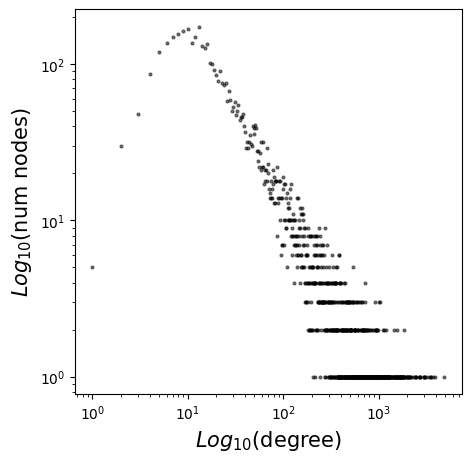

In [13]:
# C5:SanityCheck
fig = plot_degree_numbers_and_counts(degree_numbers, degree_counts)

In [14]:
# C5:Inline(1/5)

# Look at the visualization, do the two transformed quantitiees appear to exhibit a relationship? Print "Yes" or "No".
print("Yes")

Yes


__C6.__ _(3 pts)_ For a given node $u$ in our network $G$, let $\Gamma(u)$ denote the set of $u$'s neighbors, i.e., set of nodes linked to $u$.

In this part of the assignment we'll be utilizing the Jaccard coefficient (__Chapter 3.1.5.2__) similarity function on neighborhoods of nodes to determine the foods most likely to link to one anothers, i.e., appear in a recipe together heretofore unseen.

In particular, the Jaccard coefficient of nodes $u$ and $v$ is defined as

$$\frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$$

where $\Gamma(u)$ denotes the set of neighbors of $u$ and can be computed through networkx utilizing the `nx.jaccard_coefficient(G, ebunch=None)` utility.

To begin, apply the `nx.jaccard_coefficient()` function to a few seemingly dispirate and a few seemingly similar ingredients (to your sensibilities). Once this is done, remark on the function of the measure in the response box below. Does this measure work as expected?

In [15]:
# C6:Inline(1/3)

# Apply the nx.jaccard_coefficient() function to the recipe graph
# to compute the similarity between the ingredients 'salmon' and
# 'chocolate'. Return the similarity score from this cell (e.g.,
# it will be a numerical value like `0.0374822283838`).
similarity = nx.jaccard_coefficient(recipe_graph, [('salmon', 'chocolate')])
similarity = list(similarity)
similarity[0][2]


0.08391608391608392

In [16]:
# C6:Inline(1/3)

# Apply the nx.jaccard_coefficient() function to the recipe graph
# to compute the similarity between the ingredients 'coffee' and
# 'chocolate'. Return the similarity score from this cell (e.g.,
# it will be a numerical value like `0.0374822283838`).
similarity = nx.jaccard_coefficient(recipe_graph, [('coffee', 'chocolate')])
similarity = list(similarity)
similarity[0][2]


0.22459893048128343

In [17]:
# C6:Inline(1/3)

# Do these outputs make sense? I.e., do the two ingredients we 
# think of as more similar "coffee" and "chocolate" have a higher
# similarity score than those we think of as less similar?
# print "Yes" or "No"
print("Yes")

Yes


__C7.__ _(5 pts)_ Next, write a function called `unlinked`, which takes a NetworkX `graph` and the name of a node in the graph (`node_name`). This function should create a list of node `names` using the `graph.nodes()` method and corresponding adjacency matrtix from `nx.to_numpy_matrix(...)`. The function shoul then returns a list of the names of all other nodes (ingredients) for which the node (queried ingredient, `node_name`) shares no link. 

_Response._ Yes, since many recipes have `'salt'` as an ingredient it  make sense that the result will be much larger for `'chocolate'`.

In [18]:
# C7:Function(4/5)

def unlinked(graph, node_name):
    #---Your code starts here
    unlinked_nodes = []
    for node in graph.nodes:
        if node != node_name:
            if not graph.has_edge(node_name, node):
                unlinked_nodes.append(node)
                
    #---Your code ends here
    
    return unlinked_nodes

Let's test this function by using it to evaluate the outputs for 'salt' and 'chocolate'. Let's also look at the size of the outputs for each. Your output should look like this:

```
Unlinked from salt: ['white almond bark', 'Johnsonville Andouille Dinner Sausage', 'giardiniera', 'Oscar Mayer Deli Fresh Smoked Ham', 'yellow cake mix']
Unlinked from chocolate: ['feta cheese crumbles', 'seasoning', 'grape tomatoes', 'black olives', 'garbanzo beans']

# of nodes unlinked from salt: 1834
# of nodes unlinked from chocolate: 6515
```

In [19]:
# C7:SanityCheck

unlinked_from_salt = unlinked(recipe_graph, "salt")
unlinked_from_chocolate = unlinked(recipe_graph, "chocolate")

print("Unlinked from salt:", unlinked_from_salt[:5])
print("Unlinked from chocolate:", unlinked_from_chocolate[:5])
print()
print("# of nodes unlinked from salt: {}".format(len(unlinked_from_salt)))
print("# of nodes unlinked from chocolate: {}".format(len(unlinked_from_chocolate)))

Unlinked from salt: ['white almond bark', 'Johnsonville Andouille Dinner Sausage', 'Oscar Mayer Deli Fresh Smoked Ham', 'giardiniera', 'yellow cake mix']
Unlinked from chocolate: ['romaine lettuce', 'black olives', 'grape tomatoes', 'pepper', 'purple onion']

# of nodes unlinked from salt: 1834
# of nodes unlinked from chocolate: 6515


In [20]:
# C7:Inline(1/5)

# Compare the size of outputs from this function for the two quired nodes:
# `'salt'` and `'chocolate'`. Does the output make sense? Print "Yes" or "No"
print("Yes")

Yes


__C8.__ _(5 pts)_ Finally, write a function called `likely_ingredients` that takes two arguments, a networkx `graph` and the name of a node (`node_name`). Given these inputs the function should apply the `unlinked` function you wrote in _C7_ to compute all the nodes that are unlinked from the target node. Then the function should use the `nx.jaccard_coefficient(...)` function to compute the jaccard coefficient between our target node and each of the nodes in its unlinked list. Finally, the function should sort these values by the Jaccard coefficient and return the resulting list (`sorted_similarities`). The output of this function (`sorted_similiarities`) should be a list of tuples of the following format:
```
[('<node_name>', 'unlinked_node1_name', 0.3333333333333),
 ('<node_name>', 'unlinked_node2_name', 0.2222222222222),
 ...]
```

In [21]:
# C8:Function(4/5)

def likely_ingredients(graph, node_name):
    #---Your code starts here
    unlinked_nodes = unlinked(graph, node_name)
    similarities = nx.jaccard_coefficient(graph, [(node_name, node) for node in unlinked_nodes])
    similarities = list(similarities)
    sorted_similarities = sorted(similarities, key=lambda x: x[2], reverse=True)
    #---Your code ends here
    
    return sorted_similarities

Now, let's test your functino by using it to compute the top 5 most similar unlinked nodes for "whisky" and "chocolate". Your output should look like this:
```
[('whiskey', 'apple cider', 0.25663716814159293),
 ('whiskey', 'Irish whiskey', 0.24489795918367346),
 ('whiskey', 'firmly packed light brown sugar', 0.24203821656050956),
 ('whiskey', 'dark corn syrup', 0.24124513618677043),
 ('whiskey', 'pitted date', 0.24)]

[('chocolate', 'instant espresso powder', 0.2540192926045016),
 ('chocolate', 'whole almonds', 0.24731182795698925),
 ('chocolate', 'mexican chocolate', 0.23825503355704697),
 ('chocolate', 'semi-sweet chocolate morsels', 0.23636363636363636),
 ('chocolate', 'coffee liqueur', 0.2283464566929134)]
 ```

In [22]:
# C8:SanityCheck

from pprint import pprint
pprint(likely_ingredients(recipe_graph, "whiskey")[:5])
print()
pprint(likely_ingredients(recipe_graph, "chocolate")[:5])

[('whiskey', 'apple cider', 0.258160237388724),
 ('whiskey', 'Irish whiskey', 0.24691358024691357),
 ('whiskey', 'firmly packed light brown sugar', 0.24358974358974358),
 ('whiskey', 'dark corn syrup', 0.24313725490196078),
 ('whiskey', 'pitted date', 0.24148606811145512)]

[('chocolate', 'instant espresso powder', 0.255663430420712),
 ('chocolate', 'whole almonds', 0.2490974729241877),
 ('chocolate', 'mexican chocolate', 0.23986486486486486),
 ('chocolate', 'semi-sweet chocolate morsels', 0.23780487804878048),
 ('chocolate', 'coffee liqueur', 0.23015873015873015)]


In [42]:
# C8:Inline(1/5)

# Do you think this analysis provides information useful for determining
# substitutions, constructing new recipe pairings, or both?
# Print "pairings", "subsitutions", or "both"
print("both")

both
